In [2]:
#%matploplib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


Fuente de informacion repositorio ANID proyectos postulados 2016 a 2020
Macrozona Norte

In [3]:
urlAdjudicados = 'https://raw.githubusercontent.com/ANID-GITHUB/Historico-de-Proyectos-Adjudicados/master/BDH_Proyectos.csv'
dfAdjudicados = pd.read_csv(urlAdjudicados,sep=';',header=0,encoding = 'UTF-8',warn_bad_lines=False, error_bad_lines = False,lineterminator='\n') # encoding = "ISO-8859-1"

Cambio de nombre de columnas

In [7]:
dfAdjudicados = dfAdjudicados.rename(columns={'MACROZONA MINCIENCIA (segUn ax)':'MACROZONA','MONTO ADJUDICADO (MILES $)':'MONTO_ADJUDICADO'})
#print(dfAdjudicados.columns.tolist())


['CONCURSO NACIONAL REGULAR 1982' 'CONCURSO NACIONAL REGULAR 1983'
 'CONCURSO NACIONAL REGULAR 1984' 'CONCURSO NACIONAL REGULAR 1985'
 'CONCURSO NACIONAL REGULAR 1986' 'CONCURSO NACIONAL REGULAR 1987'
 'ENLACE FONDECYT 1988' 'CONCURSO NACIONAL REGULAR 1988'
 'CONCURSO NACIONAL REGULAR 1989' 'SECTORIAL LOCO 1989' 'DOCTORADO 1990'
 'CONCURSO NACIONAL REGULAR 1990'
 'I CONCURSO INVESTIGACION Y DESARROLLO (I+D) 1991'
 'I CONCURSO DE INFRAESTRUCTURA TECNOLOGICA 1991'
 'INVESTIGACION Y DESARROLLO EN SERVICIOS 1991'
 'CONCURSO POSTDOCTORADO 1991' 'CONCURSO NACIONAL REGULAR 1991'
 'DOCTORADO 1992' 'II CONCURSO INVESTIGACION Y DESARROLLO (I+D) 1992'
 'II CONCURSO DE INFRAESTRUCTURA TECNOLOGICA 1992'
 'INVESTIGACION Y DESARROLLO EN SERVICIOS 1992'
 'CONCURSO NACIONAL REGULAR 1992' 'COMPLETAR TESIS DOCTORADO 1993'
 'DOCTORADO 1993' 'III CONCURSO INVESTIGACION Y DESARROLLO (I+D) 1993'
 'CONCURSO POSTDOCTORADO 1993' 'CONCURSO NACIONAL REGULAR 1993'
 'DOCTORADO 1994' 'CONCURSO POSTDOCTORADO 1994'
 '

Construccion de dataframe por macrozona

In [16]:
dfNorte = dfAdjudicados[[
        'MACROZONA',
        'REGION_EJECUCION',
        'AÑO_CONCURSO',
        'INSTITUCION_PRINCIPAL',
        'TIPO_BENEFICIARIO',
        'NOMBRE_RESPONSABLE',
        'SEXO',
        'NOMBRE_PROYECTO',
        'INSTRUMENTO',
        'PROGRAMA_CONICYT',
        'AREA_OCDE',
        'MONTO_ADJUDICADO',
        'DURACION_MESES']]

dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.CATOLICA DEL NORTE','UNIVERSIDAD CATOLICA DEL NORTE')
dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.DE ANTOFAGASTA','UNIVERSIDAD DE ANTOFAGASTA')
dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.DE TARAPACA','UNIVERSIDAD DE TARAPACA')
dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.ARTURO PRAT','UNIVERSIDAD ARTURO PRAT')
dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.DE ATACAMA','UNIVERSIDAD DE ATACAMA')
dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('U DE ATACAMA','UNIVERSIDAD DE ATACAMA')
        
dfNorte = dfNorte.sort_values(by=['REGION_EJECUCION','AÑO_CONCURSO'])

#dfNorte.to_excel('../output/proyectos_anid_adjudicados_MZN.xlsx')

<ipython-input-16-6a5a269d9d9a>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.CATOLICA DEL NORTE','UNIVERSIDAD CATOLICA DEL NORTE')
<ipython-input-16-6a5a269d9d9a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.CATOLICA DEL NORTE','UNIVERSIDAD CATOLICA DEL NORTE')
<ipython-input-16-6a5a269d9d9a>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  dfNorte['INSTITUCION_PRINCIPAL'] = dfNorte['INSTITUCION_PRINCIPAL'].str.replace('UNIV.DE ANTOFAGASTA','UNIVERSIDAD DE ANTOFAGASTA'

Filtros para dataframe

In [17]:
AÑO = 2015

dfNorte = dfNorte[dfNorte.MACROZONA == "NORTE"]
#dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT == "FONDEQUIP"]
dfNorte = dfNorte[dfNorte.AÑO_CONCURSO >= AÑO]

# FILTROS PARA NORMALIZAR ADJUDICADOS Y POSTULADOS
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'EXPLORA']
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'PFCHA']
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'REC']
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'REGIONAL']
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'FONIS']
# dfNorte = dfNorte[dfNorte.PROGRAMA_CONICYT != 'PCI']

dfNorte.to_excel('H:/Mi unidad/Datos/Compilados/proyectos_adjudicados_MZN.xlsx')

Adjudicaciones por región '01. TARAPACA' '02. ANTOFAGASTA' '03. ATACAMA' '15. ARICA Y PARINACOTA'

######################################
Adjudicados : 479
######################################
['EXPLORA' 'INFORMACION CIENTIFICA' 'PAI' 'FONDECYT' 'REGIONAL' 'FONDEF'
 'PCI' 'FONDEQUIP' 'ASTRONOMIA' 'FONIS' 'PIA']
######################################
                        REGION_EJECUCION
REGION_EJECUCION                        
01. TARAPACA                          74
02. ANTOFAGASTA                      265
03. ATACAMA                           46
15. ARICA Y PARINACOTA                94
######################################


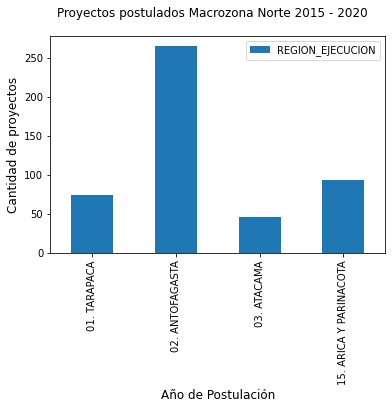

In [18]:
dfResult = dfNorte[['REGION_EJECUCION']].groupby([dfNorte.REGION_EJECUCION], dropna=False).count()

print("######################################")
print ("Adjudicados : " + str(dfNorte['MACROZONA'].count()))
print("######################################")
print(dfNorte['PROGRAMA_CONICYT'].unique())
print("######################################")
print(dfResult)
print("######################################")
dfResult.plot.bar()

plt.suptitle('Proyectos postulados Macrozona Norte ' +  str(AÑO) + ' - 2020') #+ str(datetime.datetime.now().year))
plt.ylabel('Cantidad de proyectos',fontsize=12)
plt.xlabel('Año de Postulación',fontsize=12)
plt.legend()

plt.show()
